In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as mlt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('Python_Project_5_Dec.csv')

# Part-1: Data Exploration and Pre-processing

1)load the given dataset

In [4]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


2)print all the column names

In [5]:
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

3)describe the data 

In [6]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9974.000000
mean,4999.50000,64950.978500,39.303700,1198.823800,2.731500,3.038900,2.753600,2.96890,3.208800,3.240300,3.411300,3.335500,3.366000,3.346500,3.619900,3.285600,3.627400,3.268200,14.785400,15.242130
std,2886.89568,37420.905082,15.116478,1001.774138,1.328226,1.528077,1.403241,1.28425,1.339769,1.350755,1.326012,1.340567,1.288336,1.311415,1.190028,1.269013,1.181401,1.321077,38.217509,38.810195
min,0.00000,8.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2499.75000,32330.500000,27.000000,413.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,0.000000,0.000000
50%,4999.50000,64941.000000,40.000000,852.500000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,7499.25000,97579.750000,51.000000,1747.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,13.000000,13.000000
max,9999.00000,129863.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1305.000000,1280.000000


4)Drop the column ‘Unnamed’ 

In [7]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [8]:
df.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

5)Replace all the  “  “ in column with “_”

In [9]:
df.columns=df.columns.str.replace(' ','_')

In [10]:
df.columns

Index(['id', 'Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction'],
      dtype='object')

6)Plot the number of satisfied customers and the number of unsatisfied customers 

<AxesSubplot:>

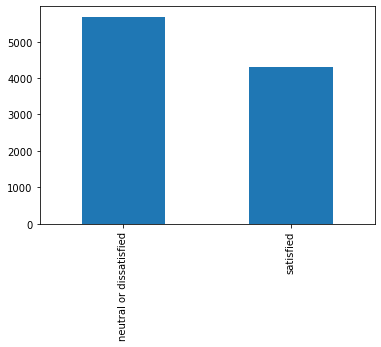

In [11]:
df['satisfaction'].value_counts().plot(kind='bar')

7)Plot the mean value of satisfaction of male and female customers

In [12]:
df["satisfaction"]=[1 if each=="satisfied" else 0 for each in df.satisfaction]

<AxesSubplot:xlabel='Gender'>

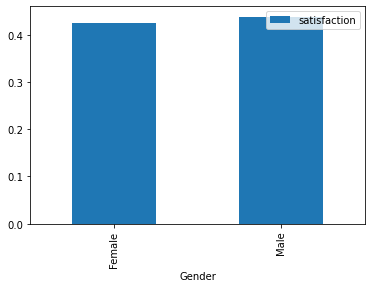

In [13]:
df[["Gender","satisfaction"]].groupby(["Gender"]).mean().plot(kind='bar')

8)Plot the mean value of satisfaction of customers with respect to Age.

<AxesSubplot:xlabel='Age'>

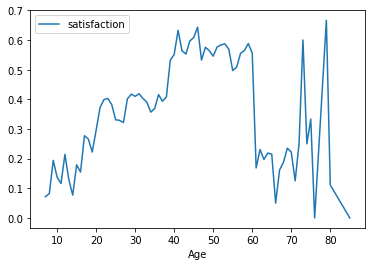

In [14]:
df[['Age','satisfaction']].groupby(['Age']).mean().plot()

9)Plot the mean value of satisfaction of customers with respect to Food_and_drink.

<AxesSubplot:xlabel='Food_and_drink'>

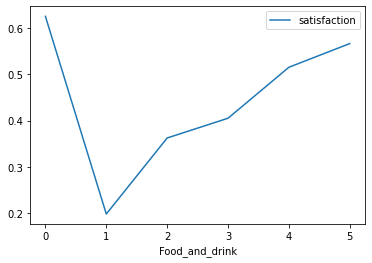

In [15]:
df[['Food_and_drink','satisfaction']].groupby(['Food_and_drink']).mean().plot()

10)Display a boxplot for Flight_Distance 

<AxesSubplot:xlabel='Flight_Distance'>

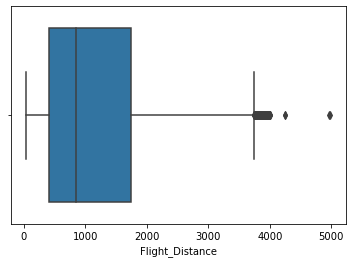

In [16]:
sns.boxplot(x=df.Flight_Distance)

11)Display a boxplot for Checkin_service

<AxesSubplot:xlabel='Checkin_service'>

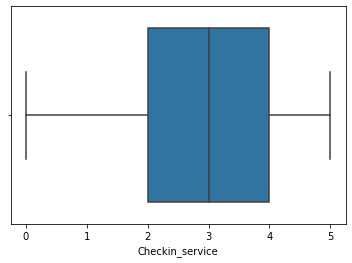

In [17]:
sns.boxplot(x=df.Checkin_service)

12)Find all the Null values 

In [18]:
df.isnull().sum()

id                                    0
Gender                                0
Customer_Type                         0
Age                                   0
Type_of_Travel                        0
Class                                 0
Flight_Distance                       0
Inflight_wifi_service                 0
Departure/Arrival_time_convenient     0
Ease_of_Online_booking                0
Gate_location                         0
Food_and_drink                        0
Online_boarding                       0
Seat_comfort                          0
Inflight_entertainment                0
On-board_service                      0
Leg_room_service                      0
Baggage_handling                      0
Checkin_service                       0
Inflight_service                      0
Cleanliness                           0
Departure_Delay_in_Minutes            0
Arrival_Delay_in_Minutes             26
satisfaction                          0
dtype: int64

13)Drop all the na values 

In [19]:
df.dropna(inplace=True)

14)Find the unique values in Flight_Distance 

In [20]:
df.Flight_Distance.unique()

array([ 460,  235, 1142, ..., 3033, 1319, 1443], dtype=int64)

# Part-2: Working with Models

1)Perform encoding in columns Gender, Customer_Type, Type_of_Travel, and Class. 

In [21]:
le=LabelEncoder()

In [22]:
df['Gender']=le.fit_transform(df['Gender'])
df['Customer_Type'] = le.fit_transform(df['Customer_Type'])
df['Type_of_Travel'] = le.fit_transform(df['Type_of_Travel'])
df['Class'] = le.fit_transform(df['Class'])


2)Drop the column id 

In [23]:
df.drop(['id'],axis=1,inplace=True)

3)Create the features and target Data

In [24]:
X = df.drop('satisfaction',axis=1)
y = df['satisfaction']

4)Perform scaling on features data  

In [25]:
sc=StandardScaler()

In [26]:
X=sc.fit_transform(X)

5)Split the data in training and testing sets 

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [28]:
X_train.shape

(7979, 22)

In [29]:
X_test.shape

(1995, 22)

6) Fit the decision tree model with various parameters

In [30]:
model=tree.DecisionTreeClassifier(criterion='gini',
                                 splitter='best',
                                 max_depth=2,
                                 min_samples_split=0.1,
                                 min_samples_leaf=1,
                                 min_weight_fraction_leaf=0.3,
                                 max_features='auto',
                                 random_state=1)

In [31]:
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, max_features='auto', min_samples_split=0.1,
                       min_weight_fraction_leaf=0.3, random_state=1)

In [32]:
model.score(X_train,y_train)

0.7450808371976438

In [33]:
model.score(X_test,y_test)

0.7483709273182957

7) Create a function to display precision score, recall score, accuracy, classification report, confusion matrix, F1 Score

In [34]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score

In [35]:
def run_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train,y_train.ravel())
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("pricison_score: ",precision_score(y_test, y_pred))
    print("recall_score: ",recall_score(y_test, y_pred))
    print("Accuracy = {}".format(accuracy))
    print(classification_report(y_test,y_pred,digits=5))
    print(confusion_matrix(y_test,y_pred))
    

In [36]:
run_model(model,X_train, y_train, X_test, y_test)

pricison_score:  0.6691568836712913
recall_score:  0.7655677655677655
Accuracy = 0.7483709273182957
              precision    recall  f1-score   support

           0    0.81853   0.73639   0.77529      1176
           1    0.66916   0.76557   0.71412       819

    accuracy                        0.74837      1995
   macro avg    0.74384   0.75098   0.74471      1995
weighted avg    0.75721   0.74837   0.75018      1995

[[866 310]
 [192 627]]
